In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

    100% |████████████████████████████████| 993kB 20.5MB/s 


In [0]:
ls

adc.json  sample_data/


In [0]:
mkdir image

In [0]:
ls

adc.json  bboxed/  Filename.csv  image/  sample_data/


In [0]:
link = 'https://drive.google.com/open?id=1cI8dGHtaT4iC8kFTN7YpaK0GdTCiUQ87'

In [0]:
fluff, id = link.split('=')
print (id)

1cI8dGHtaT4iC8kFTN7YpaK0GdTCiUQ87


In [0]:
import pandas as pd
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('Filename.csv')  
df3 = pd.read_csv('Filename.csv')

In [0]:
df3.head()

,_unit_id,category,category:confidence,image_url
0,851505458,ikat,0.3487,http://s3-eu-west-1.amazonaws.com/we-attribute...
1,851505459,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
2,851505460,polka dot,0.6709,http://s3-eu-west-1.amazonaws.com/we-attribute...
3,851505461,plain,1.0000,http://s3-eu-west-1.amazonaws.com/we-attribute...
4,851505462,geometry,0.7035,http://s3-eu-west-1.amazonaws.com/we-attribute...


In [0]:
df3 = df3.rename(columns={"category:confidence":"confi"})

In [0]:
df3.shape

(15702, 4)

In [0]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15702 entries, 0 to 15701
Data columns (total 4 columns):
_unit_id     15702 non-null int64
category     15702 non-null object
confi        15702 non-null float64
image_url    15702 non-null object
dtypes: float64(1), int64(1), object(2)
memory usage: 490.8+ KB


In [0]:
category_list = df3.category.unique()
category_list

array(['ikat', 'plain', 'polka dot', 'geometry', 'floral', 'squares',
       'scales', 'animal', 'OTHER', 'stripes', 'tribal', 'houndstooth',
       'cartoon', 'chevron', 'stars', 'letter_numb', 'skull'],
      dtype=object)


No null values are here


/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Text(0.5, 1.0, 'count of categorys')

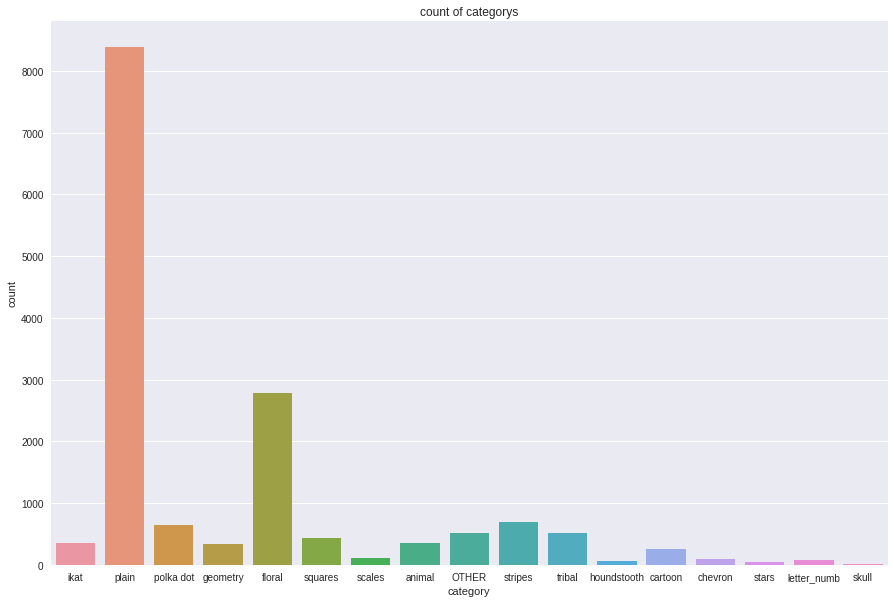

In [0]:
import seaborn as sns
from matplotlib import pyplot

a4_dims = (15, 10)
ax = pyplot.subplots(figsize=a4_dims)

ax = sns.countplot(df3['category'],label="Count")
ax.set_title('count of categorys')

In [0]:
value_count = (df3['category'].value_counts()/df3.shape[0])*100

print('% of every category')
print(value_count)

% of every category
plain          53.400841
floral         17.679277
stripes         4.464399
polka dot       4.145969
OTHER           3.267100
tribal          3.228888
squares         2.795822
ikat            2.260858
animal          2.241753
geometry        2.178066
cartoon         1.662209
scales          0.713285
chevron         0.611387
letter_numb     0.522226
houndstooth     0.420329
stars           0.286588
skull           0.121004
Name: category, dtype: float64


In [0]:
df_greater3 = df3[df3['confi'] > 0.5]
df_greater3.shape

(14173, 4)

In [0]:
value_count3 = (df_greater3['category'].value_counts()/df_greater3.shape[0])*100
value_count3

plain          57.419036
floral         18.344740
stripes         4.572074
polka dot       4.155789
squares         2.751711
tribal          2.384816
OTHER           2.208424
animal          2.166090
geometry        1.516969
ikat            1.277076
cartoon         1.213575
chevron         0.536231
letter_numb     0.522120
scales          0.373950
houndstooth     0.232837
stars           0.204614
skull           0.119946
Name: category, dtype: float64

In [0]:
""" Download original images
"dress_patterns.csv" is the original txt data.
From that, download original images.
"""
import sys
import csv
from tqdm import tqdm
from urllib.request import urlretrieve

with open("Filename.csv") as file:
    reader = csv.reader(file)

    header = reader.__next__()

    for row in tqdm(reader):
        uid = row[0]
        url = row[-1]
        try:
            urlretrieve(url, "image/%s.png" % uid)
        except Exception:
            print(row, file=sys.stderr)


0it [00:00, ?it/s]
1it [00:00,  1.23it/s]
2it [00:01,  1.24it/s]
3it [00:02,  1.26it/s]
4it [00:03,  1.33it/s]
5it [00:03,  1.38it/s]
6it [00:04,  1.41it/s]
7it [00:05,  1.42it/s]
8it [00:05,  1.38it/s]
9it [00:06,  1.41it/s]
10it [00:07,  1.43it/s]
11it [00:07,  1.45it/s]
12it [00:08,  1.42it/s]
13it [00:09,  1.40it/s]
14it [00:10,  1.37it/s]
15it [00:10,  1.41it/s]
16it [00:11,  1.43it/s]
17it [00:12,  1.38it/s]
18it [00:12,  1.39it/s]
19it [00:13,  1.38it/s]
20it [00:14,  1.39it/s]
21it [00:15,  1.42it/s]
22it [00:15,  1.37it/s]
23it [00:16,  1.41it/s]
24it [00:17,  1.34it/s]
25it [00:17,  1.39it/s]
26it [00:18,  1.43it/s]
27it [00:19,  1.45it/s]
28it [00:19,  1.46it/s]
29it [00:20,  1.41it/s]
30it [00:21,  1.36it/s]
31it [00:22,  1.40it/s]
32it [00:22,  1.42it/s]
33it [00:23,  1.38it/s]
34it [00:24,  1.35it/s]
35it [00:25,  1.36it/s]
36it [00:25,  1.34it/s]
37it [00:26,  1.37it/s]
38it [00:27,  1.35it/s]
39it [00:28,  1.33it/s]
40it [00:28,  1.36it/s]
41it [00:29,  1.34it/s]
42it 

In [0]:
import pandas as pd

In [0]:
categories = pd.get_dummies(df3[['category']]).as_matrix()

In [0]:
""" Process images
The original images contain red or black bordered boxes.
And I couldn't have found the real original images of the original images.
So, I just removed the outside of the boxes.
"""
import sys
import csv
import cv2
import numpy as np
from skimage.io import imread, imsave
from tqdm import tqdm

def autosplit(image):
    if len(image.shape) == 2:
        image = np.stack([image]*3, axis=-1)
        bg_color_lb = np.array([0, 0, 0])
        bg_color_ub = np.array([5, 5, 5])
    elif len(image.shape) == 3:
        bg_color_lb = np.array([254, 0, 0])
        bg_color_ub = np.array([255, 0, 0])
        if image.shape[2] != 3:
            image = image[:, :, :3]
    else:
        raise Exception("{} {}".format(uid, img.shape))

    mask = ~cv2.inRange(image, bg_color_lb, bg_color_ub)
    ret, _, stat, _ = cv2.connectedComponentsWithStats(mask, connectivity=8)

    split_list = []
    for idx in range(1, ret):
        top = stat[idx, cv2.CC_STAT_TOP]
        left = stat[idx, cv2.CC_STAT_LEFT]
        w = stat[idx, cv2.CC_STAT_WIDTH]
        h = stat[idx, cv2.CC_STAT_HEIGHT]

        if h == image.shape[0] and w == image.shape[1]:
            continue
        if h < 32 or w < 32:
            continue

        split_list.append(image[top:top + h, left:left + w])

    split_list.sort(key=lambda x: x.shape[0] * x.shape[1], reverse=True)
    return split_list


In [0]:
url_list = list()
unique_id = list()
for link,uid in zip(df3['image_url'],df3['_unit_id']):
  if link not in url_list:
    url_list.append(link)
    unique_id.append(uid)

In [0]:
len(unique_id)

15548

In [0]:
len(df3._unit_id.unique())

15702

In [0]:
mkdir bboxed

In [0]:
ls

adc.json  bboxed/  Filename.csv  sample_data/


In [0]:
import numpy as np 

X = np.empty(shape=[1]+[3]+[50]+[50], dtype='float32')
A = np.empty(shape=[0]+[3]+[50]+[50], dtype='float32')

id_list = list()

for uid in tqdm(unique_id):
        try:
            img = imread("image/%s.png" % uid)
            box = autosplit(img)
            if box:
                imsave("bboxed/%s.jpg" % uid, box[0])
                id_list.append(uid)
                resized_img = cv2.resize(box[0], (50, 50))
                X_temp = resized_img/255.
                for i in range(3):
                  for j in range(50):
                    for k in range(50):
                        X[0,i,j,k] = X_temp[j,k,i]
                        
                A = np.vstack([A, X])
        except Exception as e:
            print(file=sys.stderr)
            print("Error on", uid, file=sys.stderr)
            print(e, file=sys.stderr)
            exit()

  0%|          | 0/15548 [00:00<?, ?it/s]
Error on 851505458
[Errno 2] No such file or directory: 'image/851505458.png'

Error on 851505459
[Errno 2] No such file or directory: 'image/851505459.png'

Error on 851505460
[Errno 2] No such file or directory: 'image/851505460.png'

Error on 851505461
[Errno 2] No such file or directory: 'image/851505461.png'

Error on 851505462
[Errno 2] No such file or directory: 'image/851505462.png'

Error on 851505463
[Errno 2] No such file or directory: 'image/851505463.png'

Error on 851505464
[Errno 2] No such file or directory: 'image/851505464.png'

Error on 851505465
[Errno 2] No such file or directory: 'image/851505465.png'

Error on 851505466
[Errno 2] No such file or directory: 'image/851505466.png'

Error on 851505467
[Errno 2] No such file or directory: 'image/851505467.png'

Error on 851505468
[Errno 2] No such file or directory: 'image/851505468.png'

Error on 851505469
[Errno 2] No such file or directory: 'image/851505469.png'

Error on 8

KeyboardInterrupt: ignored

In [0]:
A.shape

(0, 3, 50, 50)

In [0]:
print(A[0])

[[[0.56078434 0.5647059  0.5137255  ... 0.8039216  0.81960785 0.827451  ]
  [0.42352942 0.52156866 0.54901963 ... 0.87058824 0.8666667  0.8156863 ]
  [0.52156866 0.6        0.5686275  ... 0.9607843  0.9529412  0.92156863]
  ...
  [0.5647059  0.6039216  0.6431373  ... 0.8156863  0.8156863  0.7921569 ]
  [0.5764706  0.5647059  0.56078434 ... 0.81960785 0.8235294  0.81960785]
  [0.58431375 0.58431375 0.5686275  ... 0.8235294  0.8235294  0.8235294 ]]

 [[0.654902   0.6509804  0.6        ... 0.8509804  0.85490197 0.8627451 ]
  [0.47843137 0.5647059  0.5921569  ... 0.92156863 0.92156863 0.87058824]
  [0.5647059  0.6313726  0.6        ... 0.9764706  0.9607843  0.92941177]
  ...
  [0.654902   0.6745098  0.54509807 ... 0.84705883 0.84313726 0.81960785]
  [0.6509804  0.6313726  0.6509804  ... 0.8392157  0.84313726 0.8392157 ]
  [0.6666667  0.6666667  0.6509804  ... 0.8352941  0.84705883 0.84313726]]

 [[0.6862745  0.6627451  0.627451   ... 0.7647059  0.77254903 0.7882353 ]
  [0.46666667 0.541176

In [0]:
len(id_list)

15392

In [0]:
id_list

['851505458',
 '851505459',
 '851505460',
 '851505461',
 '851505462',
 '851505463',
 '851505464',
 '851505465',
 '851505466',
 '851505467',
 '851505468',
 '851505469',
 '851505470',
 '851505471',
 '851505472',
 '851505473',
 '851505474',
 '851505476',
 '851505477',
 '851505478',
 '851505479',
 '851505481',
 '851505482',
 '851505483',
 '851505484',
 '851505485',
 '851505486',
 '851505487',
 '851505488',
 '851505489',
 '851505490',
 '851505491',
 '851505492',
 '851505493',
 '851505494',
 '851505496',
 '851505497',
 '851505498',
 '851505499',
 '851505500',
 '851505501',
 '851505502',
 '851505503',
 '851505504',
 '851505505',
 '851505506',
 '851505507',
 '851505508',
 '851505509',
 '851505510',
 '851505511',
 '851505512',
 '851505513',
 '851505514',
 '851505515',
 '851505516',
 '851505517',
 '851505518',
 '851505519',
 '851505520',
 '851505521',
 '851505522',
 '851505523',
 '851505524',
 '851505525',
 '851505526',
 '851505527',
 '851505528',
 '851505529',
 '851505530',
 '851505531',
 '8515

In [0]:
cleanup = df3['_unit_id'].isin(id_list)
categories = pd.get_dummies(df3.loc[cleanup].category).as_matrix()


In [0]:
confidence = list(df3.loc[cleanup].confi)

In [0]:
len(confidence)

15541

In [0]:
categories.shape

(15541, 17)

In [0]:
x = np.array(confidence)

NameError: ignored

ValueError: ignored

In [0]:
from sklearn.model_selection import train_test_split
# split up data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(
    A, categories, test_size=0.2, random_state=20)

In [0]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(12432, 3, 50, 50)
(3109, 3, 50, 50)
(12432, 17)
(3109, 17)


In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Convolution2D, MaxPooling2D, Flatten
from keras.regularizers import l2, l1
from keras.optimizers import SGD

from keras import backend as K
K.set_image_dim_ordering('th')

model = Sequential()
model.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(3, 50, 50), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(17, activation='softmax'))
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(3, 50, 50..., activation="relu", padding="valid")`
  # Remove the CWD from sys.path while we load stuff.


In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 46, 46)        2432      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 23, 23)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 32, 23, 23)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 16928)             0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               2166912   
_________________________________________________________________
dense_4 (Dense)              (None, 17)                2193      
Total params: 2,171,537
Trainable params: 2,171,537
Non-trainable params: 0
_________________________________________________________________


In [0]:
model = model.fit(X_train, y_train,  batch_size = 256,
          nb_epoch = 10, verbose=2, validation_data=(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 12432 samples, validate on 3109 samples
Epoch 1/10
 - 2s - loss: 1.9327 - acc: 0.5125 - val_loss: 1.6048 - val_acc: 0.5690
Epoch 2/10
 - 2s - loss: 1.5002 - acc: 0.6045 - val_loss: 1.4740 - val_acc: 0.6082
Epoch 3/10
 - 2s - loss: 1.4042 - acc: 0.6273 - val_loss: 1.4386 - val_acc: 0.6217
Epoch 4/10
 - 2s - loss: 1.3452 - acc: 0.6367 - val_loss: 1.4020 - val_acc: 0.6330
Epoch 5/10
 - 2s - loss: 1.2895 - acc: 0.6474 - val_loss: 1.3949 - val_acc: 0.6356
Epoch 6/10
 - 2s - loss: 1.2646 - acc: 0.6500 - val_loss: 1.4050 - val_acc: 0.6298
Epoch 7/10
 - 2s - loss: 1.2051 - acc: 0.6588 - val_loss: 1.3952 - val_acc: 0.6349
Epoch 8/10
 - 2s - loss: 1.1488 - acc: 0.6741 - val_loss: 1.4195 - val_acc: 0.6304
Epoch 9/10
 - 2s - loss: 1.0956 - acc: 0.6819 - val_loss: 1.4146 - val_acc: 0.6266
Epoch 10/10
 - 2s - loss: 1.0575 - acc: 0.6942 - val_loss: 1.4665 - val_acc: 0.6275


In [0]:
predicted = model.model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# put the y_test back into a format of non-one-hot encoded for comparison
y_test_orig = pd.DataFrame(y_test).idxmax(1)
print("Convolution Network Results\nConfusion Matrix: ")
print(confusion_matrix(y_test_orig,predicted))
print("\n Classifcation Report")
print(classification_report(y_test_orig,predicted))

Convolution Network Results
Confusion Matrix: 
[[   0    0    0    0   22    0    0    0    0   85    0    0    0    1
     0    1    0]
 [   0    1    0    0   51    0    0    0    0   29    0    0    0    1
     0    1    1]
 [   0    0    0    0   15    0    0    0    0   25    1    0    0    0
     0    0    0]
 [   0    1    0    0    6    0    0    0    0    9    0    0    0    0
     0    0    0]
 [   1    2    0    0  288    0    0    0    0  233    1    0    0    3
     0    1    3]
 [   0    0    0    0   30    1    0    0    0   37    0    0    0    1
     0    0    1]
 [   0    0    0    0    7    0    0    0    0    5    0    0    0    0
     0    2    0]
 [   1    0    0    0   35    0    0    0    0   42    0    0    0    0
     0    2    0]
 [   0    0    0    0    5    0    0    0    0   10    0    0    0    0
     0    1    0]
 [   0    0    1    0   26    0    0    0    0 1614    0    0    0    2
     0    2    0]
 [   0    0    0    0   67    0    0    0    0   68  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
model1 = Sequential()
model1.add(Convolution2D(32, 5, 5, border_mode='valid', input_shape=(3, 50, 50), activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(64, 5, 5, border_mode='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(128, 5, 5, border_mode='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Convolution2D(256, 5, 5, border_mode='valid', activation='relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Dropout(0.2))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(17, activation='softmax'))
# Compile model
model1.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (5, 5), input_shape=(3, 50, 50..., activation="relu", padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (5, 5), activation="relu", padding="valid")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (5, 5), activation="relu", padding="valid")`
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (5, 5), activation="relu", padding="valid")`
  


In [0]:
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 32, 46, 46)        2432      
_________________________________________________________________
dropout_16 (Dropout)         (None, 32, 46, 46)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 64, 42, 42)        51264     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 64, 21, 21)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 64, 21, 21)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 128, 17, 17)       204928    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 128, 8, 8)         0         
__________

In [0]:
model1 = model1.fit(X_train, y_train,  batch_size = 256,
          nb_epoch = 10, verbose=2, validation_data=(X_test,y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 12432 samples, validate on 3109 samples
Epoch 1/10
 - 8s - loss: 1.8817 - acc: 0.4928 - val_loss: 1.7313 - val_acc: 0.5291
Epoch 2/10
 - 7s - loss: 1.5340 - acc: 0.5678 - val_loss: 1.5446 - val_acc: 0.5963
Epoch 3/10
 - 7s - loss: 1.4777 - acc: 0.6129 - val_loss: 1.7177 - val_acc: 0.4950
Epoch 4/10
 - 7s - loss: 1.4585 - acc: 0.6177 - val_loss: 1.4710 - val_acc: 0.6230
Epoch 5/10
 - 7s - loss: 1.4139 - acc: 0.6281 - val_loss: 1.4585 - val_acc: 0.6195
Epoch 6/10
 - 7s - loss: 1.4070 - acc: 0.6301 - val_loss: 1.4273 - val_acc: 0.6288
Epoch 7/10
 - 7s - loss: 1.3664 - acc: 0.6454 - val_loss: 1.4066 - val_acc: 0.6269
Epoch 8/10
 - 7s - loss: 1.3300 - acc: 0.6572 - val_loss: 1.3451 - val_acc: 0.6478
Epoch 9/10
 - 7s - loss: 1.3280 - acc: 0.6566 - val_loss: 1.3590 - val_acc: 0.6507
Epoch 10/10
 - 7s - loss: 1.3015 - acc: 0.6618 - val_loss: 1.3355 - val_acc: 0.6507


In [0]:
predicted1 = model1.model.predict_classes(X_test)

In [0]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix

# put the y_test back into a format of non-one-hot encoded for comparison
y_test_orig = pd.DataFrame(y_test).idxmax(1)
print("Convolution Network Results\nConfusion Matrix: ")
print(confusion_matrix(y_test_orig,predicted1))
print("\n Classifcation Report")
print(classification_report(y_test_orig,predicted1))

Convolution Network Results
Confusion Matrix: 
[[   0    0    0    0   34    0    0    0    0   71    0    0    0    0
     0    4    0]
 [   0    0    0    0   51    0    0    0    0   24    0    0    0    0
     0    9    0]
 [   0    0    0    0   22    0    0    0    0   18    0    0    0    0
     0    1    0]
 [   0    0    0    0    6    0    0    0    0    7    0    0    0    0
     0    3    0]
 [   0    0    0    0  340    0    0    0    0  182    0    0    0    0
     0   10    0]
 [   0    0    0    0   34    0    0    0    0   29    0    0    0    0
     0    7    0]
 [   0    0    0    0    6    0    0    0    0    4    0    0    0    0
     0    4    0]
 [   0    0    0    0   37    0    0    0    0   37    0    0    0    0
     0    6    0]
 [   0    0    0    0    2    0    0    0    0   12    0    0    0    0
     0    2    0]
 [   0    0    0    0   24    0    0    0    0 1608    0    0    0    0
     0   13    0]
 [   0    0    0    0   83    0    0    0    0   55  

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
# reshape the training and test data
A_new = np.empty(shape=[A.shape[0]] + [7500], dtype='float32')
for i in range(A.shape[0]):
    A_new[i,:] = A[i,:,:,:].flatten()

In [0]:
A_new.shape

(15541, 7500)

In [0]:
A_df = pd.DataFrame(A_new)